In [1]:
import pandas as pd

df = pd.read_excel('data/Formulir pendaftaran mitra R2.xlsx')

print(df.head())

                Timestamp   Dealer Nama ( Sesuai KTP )  No Telephone  \
0 2024-11-08 19:33:56.000      NaN           A.nahrowi  083115306930   
1 2024-11-15 15:14:11.445      NaN           Mardalita  089693687060   
2 2024-10-21 06:55:35.030  Bintang          Junantoro   085891319697   
3 2024-10-28 17:45:06.955      NaN              AMRODI  082281546425   
4 2024-10-28 17:21:49.053      NaN              AMRODI  082281546425   

                Alamat Tempat Tinggal ( Sesuai KTP )  \
0                      Jl. KH muhasan 1 blok D no 22   
1  Lingkungan cipayung rt 002 rw 029 no. 60 depok...   
2                        Komplek Kostrad RT RW 10/07   
3  TEMPAT/TGL LAHIR :LAM-TENG, 09-09-1990\nJENIS ...   
4                                     DUSUN SUKARAME   

  Alamat Domisili ( Jika Berbeda dengan KTP ) wajib di tulis  \
0                                                Sda           
1  Lingkungan cipayung rt 002 rw 029 no. 60 depok...           
2                        Komplek Kostr

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


class Account:
    def __init__(self, user_id, name, referral, reftarget):
        self.user_id = user_id
        self.name = name
        self.referral = referral
        self.reftarget = reftarget

    def __repr__(self):
        return self.name

accounts = []

#inisialisasi 
for index, row in df.iterrows():
    personname = row['Nama ( Sesuai KTP )'] 
    referral = row['ReferenceKey'] 
    reftarget = row['ReferenceTo']
    
    acc = Account(index, personname, referral, reftarget)
    
    accounts.append(acc)

print(accounts[:3])
print(accounts[20].referral)
    
    

[A.nahrowi, Mardalita, Junantoro ]
nan


Referrals:
{'MUCHLIS', 'ANDRES', 'ANDIPURNOMO', 'JAMALUDIN', 'RIZKYARYA', 'FARHAHMILANDA', 'EKI', 'DENNYNUPRIYANDI', 'LILIRAHMAYANTI', 'AAN', 'LINN', 'HERUPRASETYO', 'FABIANHERISANDI', 'DARSONO', 'MARYATI', 'IWAN', 'KIBO'}
Unfound referrals:
['MYUSUF', 'DIRGA', 'BURHAN', 'TNA', 'LUTHFY']


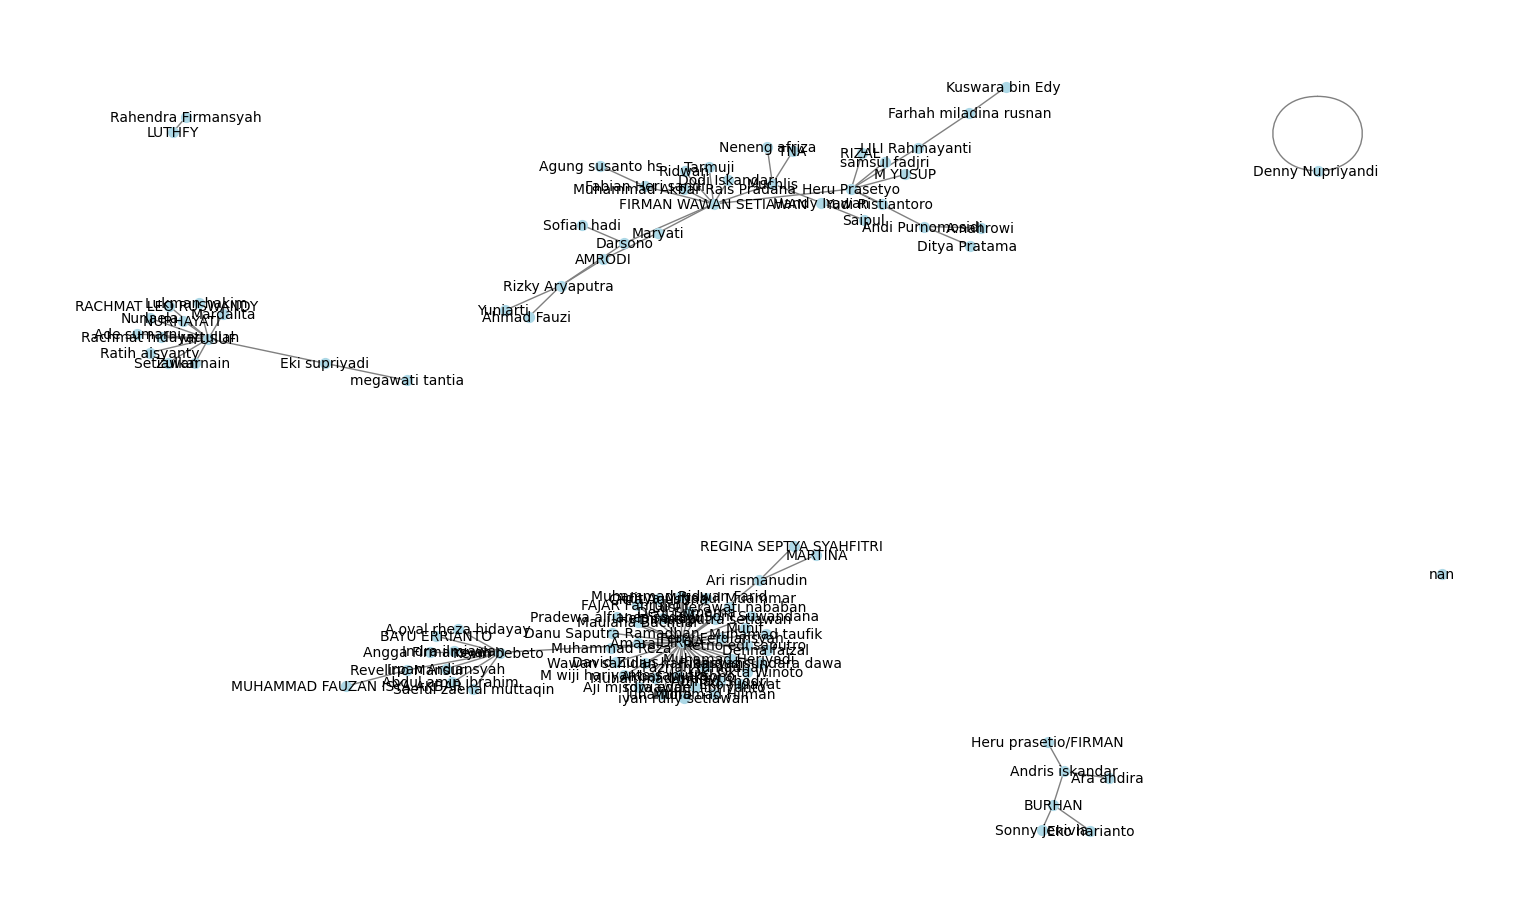

In [3]:
make_parent_node = True

G = nx.Graph()
    
existing_referrals = {acc.referral for acc in accounts if acc.referral and not pd.isna(acc.referral)}
unfound_referrals = []
#tambah node
for acc in accounts:
    G.add_node(acc.name)

#edge
for acc in accounts:
    if acc.reftarget and not pd.isna(acc.reftarget):
        target_exists = any(acc.reftarget == target.referral for target in accounts)
        
        if target_exists:
            for target in accounts:
                if acc.reftarget == target.referral:
                    G.add_edge(acc.name, target.name)  
        elif not pd.isna(acc.reftarget):
            if not (acc.reftarget in unfound_referrals): unfound_referrals.append(acc.reftarget)
            G.add_node(acc.reftarget) 
            G.add_edge(acc.name, acc.reftarget) 
print("Referrals:")
print(existing_referrals)
print("Unfound referrals:")
print(unfound_referrals)
plt.figure(figsize=(15, 9))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=50, font_size=10)
plt.show()

In [4]:
def degree_centrality(graph):
    total_nodes = len(graph) - 1 
    return {node: len(list(graph.neighbors(node))) / total_nodes for node in graph}

deg = degree_centrality(G)
deg

{'A.nahrowi': 0.009900990099009901,
 'Mardalita': 0.009900990099009901,
 'Junantoro ': 0.009900990099009901,
 'AMRODI': 0.019801980198019802,
 'Heru Prasetyo': 0.06930693069306931,
 'Saeful zaenal muttaqin': 0.009900990099009901,
 'Ridwan': 0.009900990099009901,
 'Ahmad Shodri': 0.009900990099009901,
 'FAJAR Fahrulroji ': 0.009900990099009901,
 'Pradewa alfianes sadayu': 0.009900990099009901,
 'Ari rismanudin ': 0.0297029702970297,
 'Maulana Bachtiar': 0.009900990099009901,
 'M. Soni Suwandana': 0.009900990099009901,
 'Eko hidayat': 0.009900990099009901,
 'Akbar wijaksono': 0.009900990099009901,
 'Amaral ': 0.009900990099009901,
 'Kevin bebeto ': 0.0891089108910891,
 'Muhammad muhyi': 0.009900990099009901,
 'Retno edi saputro ': 0.009900990099009901,
 'Ferry Ferdiansyah': 0.009900990099009901,
 'M wiji hariyanto saputra': 0.009900990099009901,
 'Dimas putra setiawan': 0.009900990099009901,
 'Citra Agustina': 0.009900990099009901,
 'Muhamad taufik': 0.009900990099009901,
 'Fazrian ramad

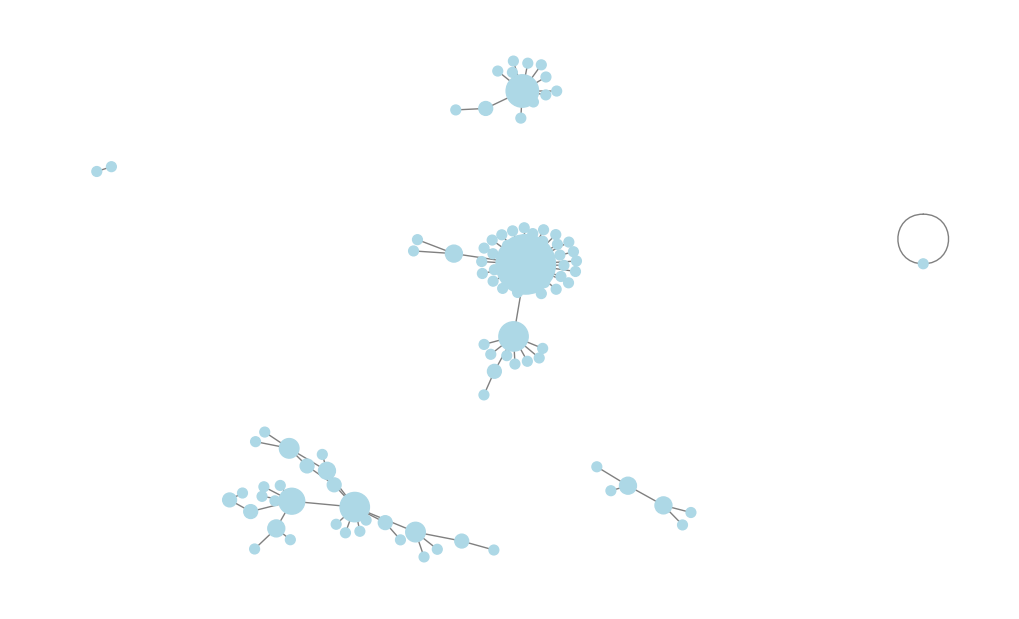

In [5]:
#visuals

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=[v * 5000 for v in deg.values()], font_size=10)
plt.show()


In [6]:
from collections import deque 
def betweenness_centrality(graph):
    bc = {node: 0 for node in graph}
    
    for start in graph:
        for target in graph:
            if start != target:
                shortest_paths = []
                deq = deque([[start]])
                
                while deq:
                    path = deq.popleft()
                    node = path[-1]
                    
                    if node == target:
                        shortest_paths.append(path)
                        continue
                    
                    for neighbor in graph.neighbors(node):
                        if neighbor not in path:
                            deq.append(path + [neighbor])
                
                for path in shortest_paths:
                    for node in path[1:-1]:
                        bc[node] += 1 / len(shortest_paths)
    
    return bc

bet = betweenness_centrality(G)
bet

{'A.nahrowi': 0,
 'Mardalita': 0,
 'Junantoro ': 0,
 'AMRODI': 149.0,
 'Heru Prasetyo': 458.0,
 'Saeful zaenal muttaqin': 0,
 'Ridwan': 0,
 'Ahmad Shodri': 0,
 'FAJAR Fahrulroji ': 0,
 'Pradewa alfianes sadayu': 0,
 'Ari rismanudin ': 186.0,
 'Maulana Bachtiar': 0,
 'M. Soni Suwandana': 0,
 'Eko hidayat': 0,
 'Akbar wijaksono': 0,
 'Amaral ': 0,
 'Kevin bebeto ': 772.0,
 'Muhammad muhyi': 0,
 'Retno edi saputro ': 0,
 'Ferry Ferdiansyah': 0,
 'M wiji hariyanto saputra': 0,
 'Dimas putra setiawan': 0,
 'Citra Agustina': 0,
 'Muhamad taufik': 0,
 'Fazrian ramadhan': 0,
 'Lusi ferawati nababan': 0,
 'Danu Saputra Ramadhan': 0,
 'Aji misdwiawan ': 0,
 'Muhamad Heriyadi ': 0,
 'Aditya Miftahul Muammar': 0,
 'Muhammad Ridwan Farid ': 0,
 'Oki Okta Winoto': 0,
 'BAYU ERRIANTO': 0,
 'Ahmad Fauzi ': 0,
 'Irpan Ardiansyah': 0,
 'Helmi akbar ': 0,
 'Maryati': 149.0,
 'David Zulius': 0,
 'Dedi Sumarna ': 0,
 'Muhamad Hilman': 0,
 'Rikardus sundara dawa': 0,
 'iyan rully setiawan': 0,
 'Wawan sahid

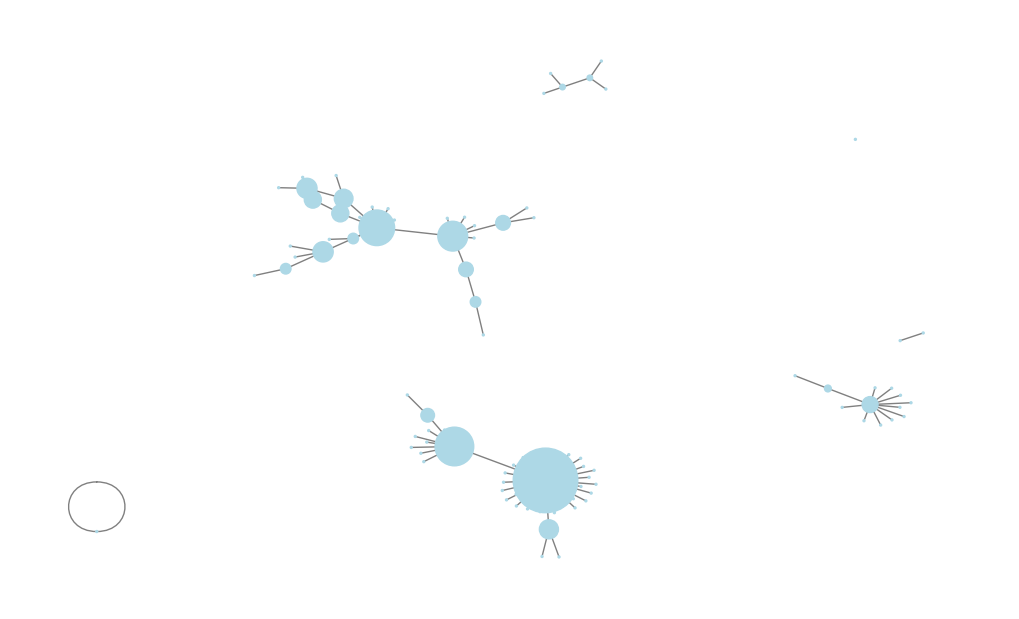

In [7]:
#visuals

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=[v * 1 + 2 for v in bet.values()], font_size=10)
plt.show()

In [8]:
from collections import deque

def bfs(graph, start):
    queue = deque([(start, 0)]) 
    distances = {start: 0}
    
    while queue:
        node, dist = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in distances:
                distances[neighbor] = dist + 1
                queue.append((neighbor, dist + 1))
    
    return distances

def closeness_centrality(graph):
    N = len(graph)
    centrality = {}
  
    for node in graph:
        distances = bfs(graph, node)
        total_distance = sum(distances.values())
        
        if total_distance > 0:
            centrality[node] = (N - 1) / total_distance
        else:
            centrality[node] = 0 
    
    return centrality

clo = closeness_centrality(G)
clo

{'A.nahrowi': 0.8632478632478633,
 'Mardalita': 4.208333333333333,
 'Junantoro ': 0.9439252336448598,
 'AMRODI': 1.01,
 'Heru Prasetyo': 1.5538461538461539,
 'Saeful zaenal muttaqin': 0.7426470588235294,
 'Ridwan': 1.188235294117647,
 'Ahmad Shodri': 0.9439252336448598,
 'FAJAR Fahrulroji ': 0.9439252336448598,
 'Pradewa alfianes sadayu': 0.9439252336448598,
 'Ari rismanudin ': 0.9805825242718447,
 'Maulana Bachtiar': 0.9439252336448598,
 'M. Soni Suwandana': 0.9439252336448598,
 'Eko hidayat': 0.9439252336448598,
 'Akbar wijaksono': 0.9439252336448598,
 'Amaral ': 0.9439252336448598,
 'Kevin bebeto ': 1.1348314606741574,
 'Muhammad muhyi': 0.9439252336448598,
 'Retno edi saputro ': 0.9439252336448598,
 'Ferry Ferdiansyah': 0.9439252336448598,
 'M wiji hariyanto saputra': 0.9439252336448598,
 'Dimas putra setiawan': 0.9439252336448598,
 'Citra Agustina': 0.9439252336448598,
 'Muhamad taufik': 0.9439252336448598,
 'Fazrian ramadhan': 0.9439252336448598,
 'Lusi ferawati nababan': 0.94392

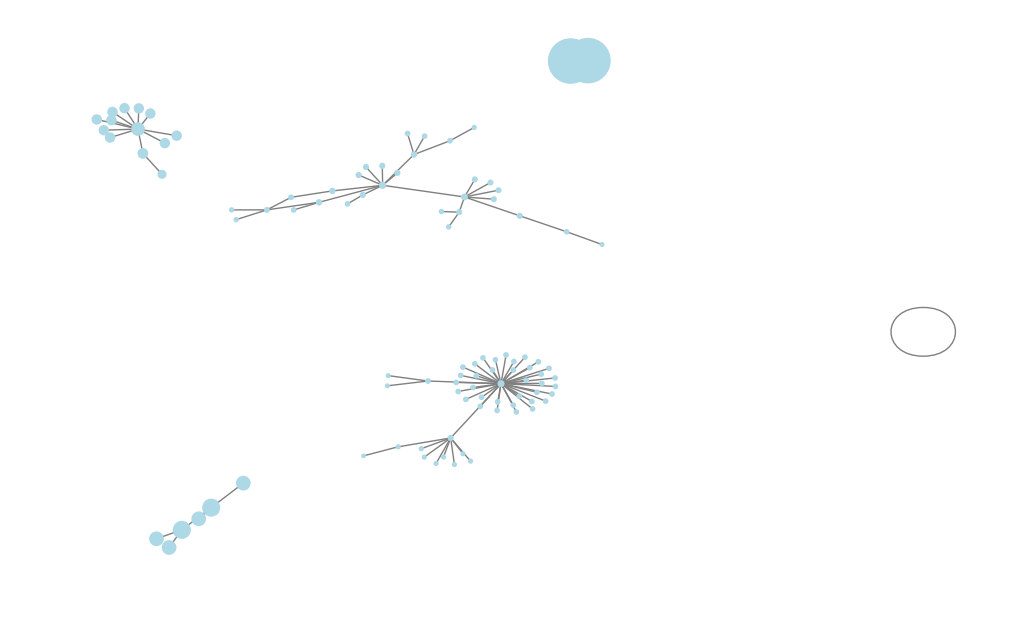

In [9]:
#visuals

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=[v * 10 for v in clo.values()], font_size=10)
plt.show()

In [10]:
import numpy as np

def eigenvector_centrality(graph, max_iter=100, tol=1e-6):
    nodes = list(graph.nodes())
    n = len(nodes)
    
    A = np.zeros((n, n)) #adj
    for i, node in enumerate(nodes):
        for neighbor in graph[node]:
            if neighbor in nodes:
                j = nodes.index(neighbor)
                A[i, j] = 1
    
    centrality = np.ones(n)
    
    for _ in range(max_iter):
        new_centrality = np.dot(A, centrality) 
        new_centrality /= np.linalg.norm(new_centrality, 2)
        centrality = new_centrality
    
    return {nodes[i]: centrality[i] for i in range(n)}

eig = eigenvector_centrality(G)
eig

{'A.nahrowi': 2.7175616504713924e-28,
 'Mardalita': 7.288851939977431e-28,
 'Junantoro ': 0.1590569735555571,
 'AMRODI': 5.700526098664067e-28,
 'Heru Prasetyo': 2.5110011348835496e-27,
 'Saeful zaenal muttaqin': 0.007215490149562924,
 'Ridwan': 1.098065840988299e-27,
 'Ahmad Shodri': 0.1590569735555571,
 'FAJAR Fahrulroji ': 0.1590569735555571,
 'Pradewa alfianes sadayu': 0.1590569735555571,
 'Ari rismanudin ': 0.16806090600306606,
 'Maulana Bachtiar': 0.1590569735555571,
 'M. Soni Suwandana': 0.1590569735555571,
 'Eko hidayat': 0.1590569735555571,
 'Akbar wijaksono': 0.1590569735555571,
 'Amaral ': 0.1590569735555571,
 'Kevin bebeto ': 0.20263041150539654,
 'Muhammad muhyi': 0.1590569735555571,
 'Retno edi saputro ': 0.1590569735555571,
 'Ferry Ferdiansyah': 0.1590569735555571,
 'M wiji hariyanto saputra': 0.1590569735555571,
 'Dimas putra setiawan': 0.1590569735555571,
 'Citra Agustina': 0.1590569735555571,
 'Muhamad taufik': 0.1590569735555571,
 'Fazrian ramadhan': 0.15905697355555

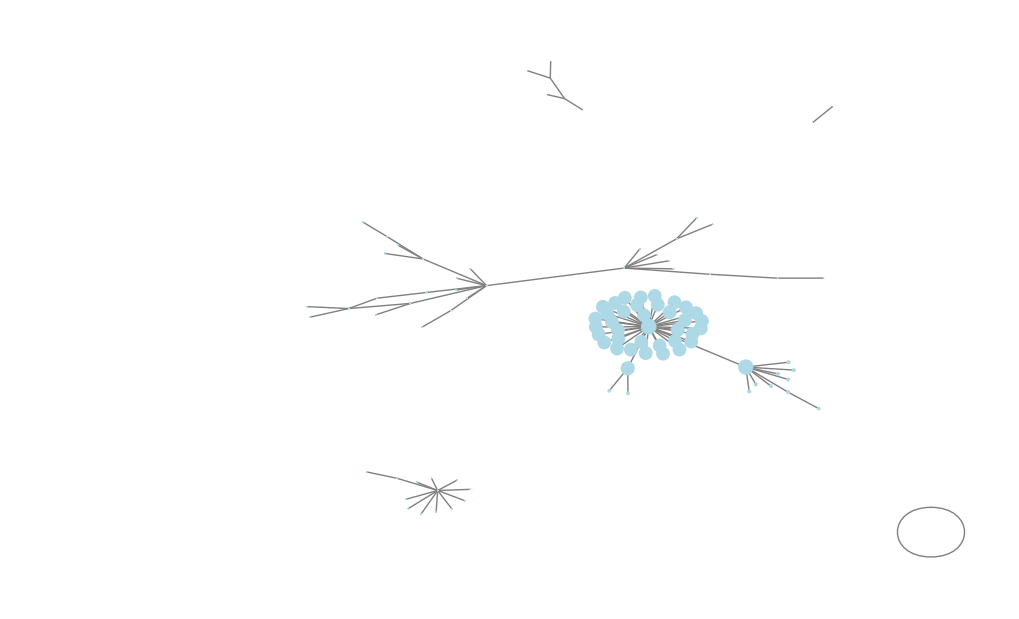

In [13]:
#visuals

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=[v * 500 for v in eig.values()], font_size=10)
plt.show()

In [17]:
def pagerank(graph, d=0.85, max_iter=100, tol=1e-6):
    nodes = list(graph.nodes())
    n = len(nodes)

    M = np.zeros((n, n))
    for i, node in enumerate(nodes):
        neighbors = graph[node]
        if neighbors:
            for neighbor in neighbors:
                if neighbor in nodes:
                    j = nodes.index(neighbor)
                    M[j, i] = 1 / len(neighbors)  
    
    rank = np.ones(n) / n 
    
    for _ in range(max_iter):
        new_rank = (1 - d) / n + d * np.dot(M, rank) 
        
        if np.linalg.norm(new_rank - rank, 1) < tol:
            break
        
        rank = new_rank
    
    return {nodes[i]: rank[i] for i in range(n)}

pr = pagerank(G)
pr

{'A.nahrowi': 0.005747023290899709,
 'Mardalita': 0.005650026984481555,
 'Junantoro ': 0.00535464748318713,
 'AMRODI': 0.00921220486085768,
 'Heru Prasetyo': 0.03172871512367418,
 'Saeful zaenal muttaqin': 0.005476455576357652,
 'Ridwan': 0.005125770798285033,
 'Ahmad Shodri': 0.00535464748318713,
 'FAJAR Fahrulroji ': 0.00535464748318713,
 'Pradewa alfianes sadayu': 0.00535464748318713,
 'Ari rismanudin ': 0.015153665188281247,
 'Maulana Bachtiar': 0.00535464748318713,
 'M. Soni Suwandana': 0.00535464748318713,
 'Eko hidayat': 0.00535464748318713,
 'Akbar wijaksono': 0.00535464748318713,
 'Amaral ': 0.00535464748318713,
 'Kevin bebeto ': 0.04241514600509367,
 'Muhammad muhyi': 0.00535464748318713,
 'Retno edi saputro ': 0.00535464748318713,
 'Ferry Ferdiansyah': 0.00535464748318713,
 'M wiji hariyanto saputra': 0.00535464748318713,
 'Dimas putra setiawan': 0.00535464748318713,
 'Citra Agustina': 0.00535464748318713,
 'Muhamad taufik': 0.00535464748318713,
 'Fazrian ramadhan': 0.005354

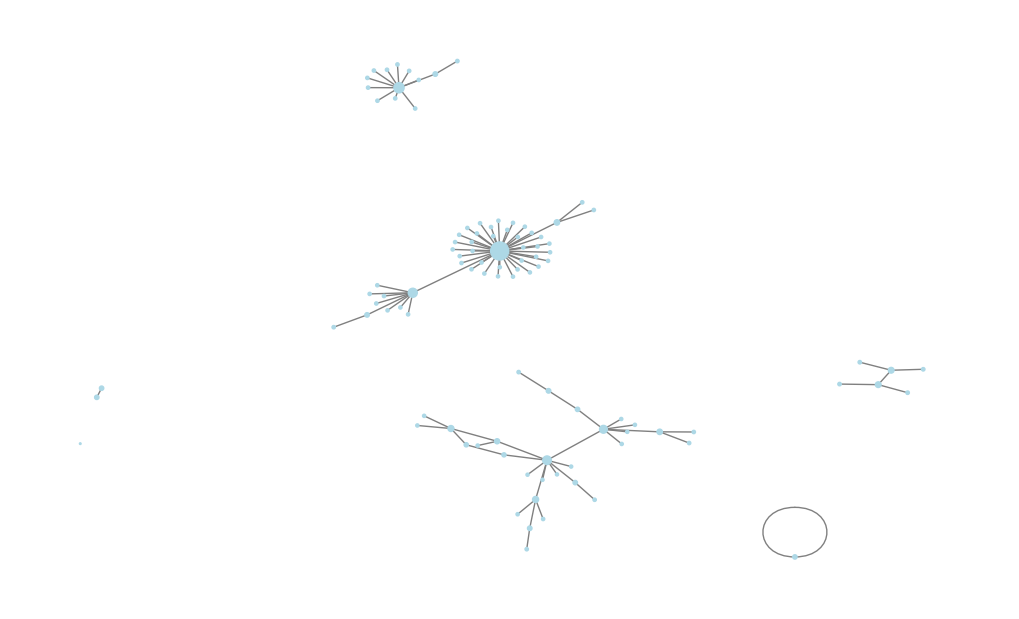

In [20]:
#visuals

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=[v * 1000 for v in pr.values()], font_size=10)
plt.show()